

## Retrieve data

First, let's get our info

In [21]:
!pip install pandas numpy sqlalchemy requests tqdm matplotlib
!rm -rf data
!rm cyclistic.db
!mkdir -p data


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [22]:
# Download Parameters
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import shutil
import sqlite3
import zipfile
from pathlib import Path
from tqdm import tqdm

Matplotlib is building the font cache; this may take a moment.


Now that we have the data downloaded, let's put it into a SQLITE db for easier manipulation.

In [23]:
download_url = "https://divvy-tripdata.s3.amazonaws.com/"
download_files = [
    "202307-divvy-tripdata.zip",
    "202308-divvy-tripdata.zip",
    "202309-divvy-tripdata.zip",
    "202310-divvy-tripdata.zip",
    "202311-divvy-tripdata.zip",
    "202312-divvy-tripdata.zip",
    "202401-divvy-tripdata.zip",
    "202402-divvy-tripdata.zip",
    "202403-divvy-tripdata.zip",
    "202404-divvy-tripdata.zip",
    "202405-divvy-tripdata.zip",
    "202406-divvy-tripdata.zip"
]
working_directory = "data/"
db_url = "cyclistic.db"

def unzip(filename):
    """Unzips a zip file and displays a progress bar."""
    with zipfile.ZipFile(filename, "r") as zip_ref:
        total_size = sum((info.file_size for info in zip_ref.infolist()))

        with zipfile.ZipFile(filename, "r") as zip_ref:
            with tqdm(
                desc=filename,
                total=total_size,
                unit="iB",
                unit_scale=True,
                unit_divisor=1024,
            ) as bar:
                for info in zip_ref.infolist():
                    zip_ref.extract(info, path=os.path.dirname(filename))

def download_zip(url, filename):
    """Downloads a zip file from the given URL and displays a progress bar."""
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    total_size = int(response.headers.get("content-length", 0))
    with open(filename, "wb") as f, tqdm(
        desc=filename,
        total=total_size,
        unit="iB",
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
            bar.update(len(chunk))

conn = sqlite3.connect(db_url)
for file in download_files:
    download_zip(download_url + file, working_directory + file)
    unzip(working_directory + file)
    os.remove(working_directory + file)
    pd.read_csv(
        working_directory + file.replace(".zip", ".csv")).to_sql(
            "cyclistic", conn, if_exists="append")

data/202307-divvy-tripdata.zip: 100%|██████████| 27.2M/27.2M [00:08<00:00, 3.26MiB/s]
data/202307-divvy-tripdata.zip:   0%|          | 0.00/147M [00:00<?, ?iB/s]
data/202308-divvy-tripdata.zip: 100%|██████████| 27.3M/27.3M [00:04<00:00, 5.96MiB/s]
data/202308-divvy-tripdata.zip:   0%|          | 0.00/148M [00:00<?, ?iB/s]
data/202309-divvy-tripdata.zip: 100%|██████████| 23.7M/23.7M [00:03<00:00, 6.96MiB/s]
data/202309-divvy-tripdata.zip:   0%|          | 0.00/128M [00:00<?, ?iB/s]
data/202310-divvy-tripdata.zip: 100%|██████████| 18.3M/18.3M [00:12<00:00, 1.56MiB/s]
data/202310-divvy-tripdata.zip:   0%|          | 0.00/103M [00:00<?, ?iB/s]
data/202311-divvy-tripdata.zip: 100%|██████████| 12.6M/12.6M [00:01<00:00, 8.94MiB/s]
data/202311-divvy-tripdata.zip:   0%|          | 0.00/69.6M [00:00<?, ?iB/s]
data/202312-divvy-tripdata.zip: 100%|██████████| 8.03M/8.03M [00:02<00:00, 3.60MiB/s]
data/202312-divvy-tripdata.zip:   0%|          | 0.00/42.9M [00:00<?, ?iB/s]
data/202401-divvy-tripdata

Now that we have everything downloaded, we are going to read the dataframe from cyclistic table in cyclistic db.

In [24]:
conn = sqlite3.connect(db_url)
df = pd.read_sql("SELECT * FROM cyclistic", conn)
df

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734376,710716,1D1EBE57758FB1EE,electric_bike,2024-06-11 08:25:42.325,2024-06-11 08:33:43.928,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968466,-87.674225,41.961524,-87.691177,member
5734377,710717,2F63E9CD01D79515,electric_bike,2024-06-24 11:40:44.516,2024-06-24 11:42:09.949,Damen Ave & Leland Ave,TA1307000158,None,None,41.967121,-87.679127,41.970000,-87.670000,member
5734378,710718,97D225818F9C7AC3,electric_bike,2024-06-30 10:43:32.975,2024-06-30 10:45:45.087,Damen Ave & Leland Ave,TA1307000158,None,None,41.967154,-87.679091,41.970000,-87.680000,member
5734379,710719,C8D2A48B901F7399,electric_bike,2024-06-11 18:20:40.861,2024-06-11 18:29:04.920,Pine Grove Ave & Irving Park Rd,TA1308000022,None,None,41.954404,-87.647983,41.930000,-87.640000,member


Now, let's dig in. What should we look at first? Let's look at the relationship of casual users vs member users and what type of bike they use.

In [25]:
manual_casual_bike = df[['member_casual', 'rideable_type']].value_counts()
manual_casual_bike

member_casual  rideable_type
member         classic_bike     1889448
               electric_bike    1795547
casual         electric_bike    1050559
               classic_bike      964446
               docked_bike        34381
Name: count, dtype: int64

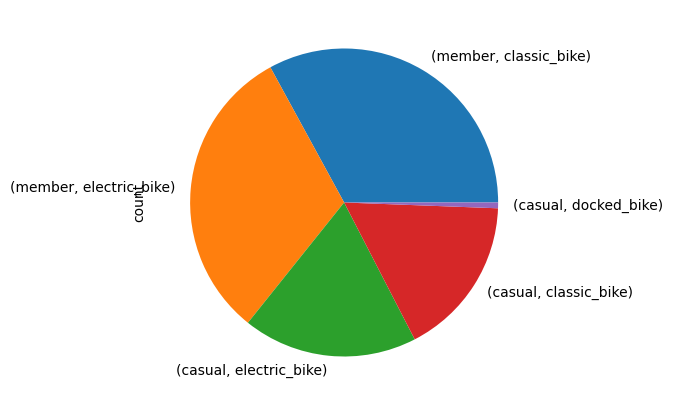

In [33]:

plot = manual_casual_bike.plot.pie(subplots=True, figsize=(5, 5))